# Car Price Prediction Project

In [27]:
import pandas as pd
import numpy as np

## Data Loading

In [53]:
# Instructions for setting up Kaggle API credentials in Google Colab Secrets:
#
# 1. Find the "Secrets" icon (🔑) in the left sidebar.
# 2. Click "Add new secret".
# 3. Create a secret named 'KAGGLE_USERNAME' with your Kaggle username as the value.
# 4. Click "Add new secret" again.
# 5. Create a secret named 'KAGGLE_KEY' with your Kaggle API key as the value (get this from Kaggle Account Settings -> API).
# 6. Ensure "Notebook access" is ON for both secrets.


In [3]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# Download the dataset
!kaggle datasets download sehriyarmemmedli/turboaz-cars-project

# Unzip the downloaded file
!unzip turboaz-cars-project.zip

Dataset URL: https://www.kaggle.com/datasets/sehriyarmemmedli/turboaz-cars-project
License(s): unknown
 91% 220M/240M [00:00<00:00, 597MB/s] 
100% 240M/240M [00:00<00:00, 579MB/s]
Archive:  turboaz-cars-project.zip
  inflating: cars.csv                


In [50]:
!rm /content/turboaz-cars-project.zip

In [6]:
df = pd.read_csv('/content/cars.csv')
display(df.head())

,id_x,car_rel_url_x,datetime_scrape,name,price_x,currency_x,datetime_product,city,day,hour,...,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
0,3c234145-d57a-4ad6-9448-d43810fc3392,/autos/8748840-hyundai-i30,2024-09-13 20:32:19.751157+00,Hyundai i30,15000.0,AZN,"Bakı, dünən 23:28",bakı,13.09.2024,23:28,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,270 000 km,Ön,Bakı,8d84d800-fafd-4d5c-b640-f47bd6c5ac20,/autos/8748840-hyundai-i30,Yüngül lehimli disklər* ABS* Mərkəzi qapanma* ...
1,c74ea36f-6be1-4de4-926d-e117197dcf00,/autos/8475807-lada-vaz-niva-travel,2024-09-13 20:32:19.751157+00,LADA (VAZ) Niva Travel,23700.0,AZN,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,...,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0 km,Tam,Bakı,2cf8b84b-adaf-467a-8f06-3dabcf866c8a,/autos/8475807-lada-vaz-niva-travel,Yüngül lehimli disklər* ABS* Kondisioner* Otur...
2,9cefceb0-024d-4581-a869-a3c2c68a9f95,/autos/8739686-toyota-land-cruiser,2024-09-13 20:32:19.751157+00,Toyota Land Cruiser,35600.0,$,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,8+,164 750 km,Tam,Bakı,22bb3704-ebe7-4357-ba2f-1806d1a7042b,/autos/8739686-toyota-land-cruiser,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...
3,459cc337-fb63-48de-9694-41554923d311,/autos/8712597-hyundai-elantra,2024-09-13 20:32:19.751157+00,Hyundai Elantra,26700.0,AZN,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,...,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,126 000 km,Ön,Bakı,e0d16dac-4091-4417-916e-cadeff600f95,/autos/8712597-hyundai-elantra,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
4,6c5ee8d8-1c6f-4fad-a694-957a4c43c25d,/autos/8674773-toyota-prius,2024-09-13 20:32:19.751157+00,Toyota Prius,10500.0,AZN,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,...,Variator,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,354 000 km,Ön,Bakı,82078856-0d07-4a0d-8123-69c2e5002e07,/autos/8674773-toyota-prius,Arxa görüntü kamerası


##  Data Cleaning and Preprocessing

### Initial Column Dropping
as these features do not contribute to model's learning and do not contain any valuable information about the price of a car.

In [7]:
df.drop(columns=["id_x", "id_y", "owner_name", "car_rel_url_x", "car_rel_url","car_rel_url_y", "img_url",
                 "car_details_id_x", "car_details_id_y", "datetime_scrape", 'engine_displacement_unit', 'city', "phone", "shop_name",
                 "datetime", "day", "hour", "views", "price_y", "currency_y", "updated", "vin", "vip", "featured", "cars_id",
                 "name", "kilometrage_unit", "Şəhər", "datetime_product", "attributes", "Buraxılış ili", 'Yürüş'], inplace=True)

In [8]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 399901


In [9]:
df = df.drop_duplicates()

### Exploring Categorical Features

In [10]:
#preparation for one hot encoding
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} unique values")

currency_x: 3 unique values
barter: 1 unique values
loan: 1 unique values
salon: 1 unique values
spare_parts: 1 unique values
description: 188435 unique values
Ban növü: 36 unique values
Hansı bazar üçün yığılıb: 9 unique values
Marka: 208 unique values
Model: 2451 unique values
Mühərrik: 7410 unique values
Qəzalı: 1 unique values
Rəng: 18 unique values
Sahiblər: 5 unique values
Sürətlər qutusu: 5 unique values
Vəziyyəti: 4 unique values
Yeni: 2 unique values
Yerlərin sayı: 8 unique values
Ötürücü: 3 unique values
extra_info: 4448 unique values


### Price Conversion to AZN

In [11]:
exchange_rates = {
    '$': 1.7,
    '€': 1.85,
    'AZN': 1
}

conversion_rates = df['currency_x'].map(exchange_rates)

df['price_manat'] = (df['price_x'] * conversion_rates).astype(int)

df.drop(columns=['price_x', 'currency_x'], inplace=True)

### Analyzing 'Mühərrik' Feature

In [12]:
df['Mühərrik'].value_counts()

,count
Mühərrik,
2.0 L/184 a.g./Dizel,6785
2.0 L/245 a.g./Benzin,4611
2.0 L/150 a.g./Benzin,4140
1.6 L/75 a.g./Benzin,3751
2.0 L / 184 a.g. / Dizel,3621
...,...
0.2 L/6 a.g./Benzin,1
2.8 L/201 a.g./Benzin,1
2.2 L/158 a.g./Benzin,1


Dropping motorcycle entries ('sm') as they only account for 340 of ~600k total entries


In [13]:
df=df[~((df['Mühərrik'].str.contains('sm')))]

### Extracting Power and Fuel Information

In [14]:
split_parts=df['Mühərrik'].str.split('/', expand=True)

# Default assignment assuming 3 parts (2nd part to Power, 3rd part to Fuel)
df['Power']=split_parts[1]
df['Fuel']=split_parts[2]

# Handle the case where there are only 2 parts (assign 1st part to Power and 2nd part to Fuel)
df.loc[split_parts[1].notnull() & split_parts[2].isnull(), 'Fuel']=split_parts[1]
df.loc[split_parts[1].notnull() & split_parts[2].isnull(), 'Power']=split_parts[0]


# Convert 'Power' column to numeric, extracting only the number if needed
df['Power']=df['Power'].str.extract('(\d+)').astype(float)

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-440361068.py:13: SyntaxWarning: invalid escape sequence '\d'
  df['Power']=df['Power'].str.extract('(\d+)').astype(float)


In [15]:
df.drop(columns=['Mühərrik'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253666 entries, 0 to 653720
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   production_year           253666 non-null  int64  
 1   engine_displacement_num   253666 non-null  float64
 2   kilometrage_num           253666 non-null  int64  
 3   barter                    71226 non-null   object 
 4   loan                      47873 non-null   object 
 5   salon                     40100 non-null   object 
 6   spare_parts               1315 non-null    object 
 7   description               246508 non-null  object 
 8   Ban növü                  253666 non-null  object 
 9   Hansı bazar üçün yığılıb  181240 non-null  object 
 10  Marka                     253666 non-null  object 
 11  Model                     253665 non-null  object 
 12  Qəzalı                    1314 non-null    object 
 13  Rəng                      253666 non-null  object

### Previewing the Cleaned Data

In [17]:
df.head()

,production_year,engine_displacement_num,kilometrage_num,barter,loan,salon,spare_parts,description,Ban növü,Hansı bazar üçün yığılıb,...,Sahiblər,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Ötürücü,extra_info,price_manat,Power,Fuel
0,2008,1.6,270000,NaN,NaN,NaN,NaN,Salam orjinal probeqdir bir ildi bizdedir biri...,"Hetçbek, 5 qapı",NaN,...,2,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,Ön,Yüngül lehimli disklər* ABS* Mərkəzi qapanma* ...,15000,115.0,Dizel
1,2024,1.7,0,NaN,NaN,Salon,NaN,LADA Niva Travel modelini nəğd və ya sərfəli l...,"Offroader / SUV, 5 qapı",Rəsmi diler,...,NaN,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Bəli,5,Tam,Yüngül lehimli disklər* ABS* Kondisioner* Otur...,23700,80.0,Benzin
2,2011,4.0,164750,NaN,NaN,NaN,NaN,Bezkraska.Mashinda hec bir problem yoxdur.Alve...,"Offroader / SUV, 5 qapı",Rəsmi diler,...,0,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,8+,Tam,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...,60520,282.0,Benzin
3,2018,2.0,126000,NaN,NaN,NaN,NaN,2019 alış\n,Sedan,NaN,...,1,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,Ön,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...,26700,150.0,Benzin
4,2007,1.5,354000,NaN,NaN,NaN,NaN,"Maşında problem yoxdur. Motor, ABS və batareya...",Liftbek,Amerika,...,2,Variator,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,Ön,Arxa görüntü kamerası,10500,76.0,Hibrid


## Feature Definition and Preprocessing Pipelines

### Defining Features and Target Variable

In [18]:
X=df.drop(columns=['price_manat'])
y=df['price_manat']

In [19]:
df.drop(columns=['description'], inplace=True)

### Categorizing Features

In [20]:
num_features=['production_year','engine_displacement_num','kilometrage_num','Power']

In [21]:
cat_features_1=['barter','loan','salon','spare_parts', 'Yeni','Qəzalı']  #yeni her ikisi var

In [22]:
cat_features_2=[ 'Ban növü','Hansı bazar üçün yığılıb','Marka','Model','Rəng','Sahiblər',
 'Sürətlər qutusu','Vəziyyəti','Yeni','Yerlərin sayı','Ötürücü','Fuel', 'extra_info'] #'extra_info'

In [23]:
df.Qəzalı.isna().sum()

np.int64(252352)

In [24]:
df.loan.value_counts()

,count
loan,
Kreditdədir,47873


### Creating Preprocessing Pipelines

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='no')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

cat_pipe_2=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor=ColumnTransformer([
    ('num_pipe', num_pipe, num_features),
    ('cat_pipe_1', cat_pipe_1, cat_features_1),
    ('cat_pipe_2', cat_pipe_2, cat_features_2)
], remainder='drop')

In [26]:
df.shape

(253666, 23)

In [28]:
df = df.astype({col: 'float32' for col in df.select_dtypes(include=['float64']).columns})


To prevent  RAM crash,  training on a small percentage of the data.

## Data Splitting and Transformation

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

In [30]:
X_train

,production_year,engine_displacement_num,kilometrage_num,barter,loan,salon,spare_parts,description,Ban növü,Hansı bazar üçün yığılıb,...,Rəng,Sahiblər,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Ötürücü,extra_info,Power,Fuel
225674,2001,2.6,328000,NaN,NaN,NaN,NaN,Maşın tam ideal vəziyyətdədi. Arginal probek. ...,Sedan,Avropa,...,Göy,NaN,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,Arxa,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...,170.0,Benzin
41141,2011,4.0,170000,NaN,NaN,NaN,NaN,"{""Masin ideal veziyyetdedir.hec bir xerc teleb...","Offroader / SUV, 5 qapı",Avropa,...,Ağ,2,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,7,Tam,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...,282.0,Benzin
455648,2017,1.6,107291,NaN,NaN,NaN,NaN,Super vəziyyətdədir.,"Hetçbek, 5 qapı",Amerika,...,Ağ,2,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,Ön,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...,120.0,Benzin
436833,2016,2.0,60000,NaN,NaN,NaN,NaN,Hyundai Elantra 2016 LİMİTEDAvtomobil Amerikad...,Sedan,Amerika,...,Ağ,0,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,Ön,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...,150.0,Benzin
156987,2019,1.8,37000,NaN,NaN,NaN,NaN,Masin yeni gelib olkeye bez karskadi hec bir p...,"Universal, 5 qapı",Yaponiya,...,Gümüşü,NaN,Variator,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,Ön,Yüngül lehimli disklər* ABS* Yağış sensoru* Mə...,98.0,Hibrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295438,2018,2.5,54400,NaN,NaN,NaN,NaN,TECILI SATILIR!!! Serviz Polnu full 2.5 mator,"Offroader / SUV, 5 qapı",Avropa,...,Qəhvəyi,2,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,Tam,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...,194.0,Benzin
244716,2012,1.6,170000,NaN,NaN,NaN,NaN,Salam mawın ıdalın ıdalıdır leşlerle bır tutma...,"Hetçbek, 5 qapı",NaN,...,Ağ,2,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,Ön,Yüngül lehimli disklər* Yağış sensoru* Mərkəzi...,8.0,Benzin
332467,2006,1.6,25000,NaN,NaN,NaN,NaN,Mawin tam ideal Vəziyyətdədir hec bir problem ...,Sedan,Rusiya,...,Qırmızı,2,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,4,Arxa,Yüngül lehimli disklər,75.0,Benzin
377698,2010,1.4,185000,Barter mümkündür,NaN,NaN,NaN,Торг возможен,"Hetçbek, 5 qapı",NaN,...,Yaş Asfalt,2,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,Ön,ABS* Mərkəzi qapanma* Kondisioner,90.0,Benzin


In [31]:
X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

Same problem, to prevent a RAM crash,  testing on a small percentage of the data.

In [32]:
X_test_sample = X_test.sample(30_000)

X_test_transformed = pd.DataFrame(preprocessor.transform(X_test_sample), columns=preprocessor.get_feature_names_out())


In [33]:
y_test_sample = y_test.loc[X_test_sample.index]

## Model Training and Evaluation

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

lr_model.fit(X_train_transformed, y_train)

y_pred = lr_model.predict(X_test_transformed)

METRICS

In [35]:
score_test=lr_model.score(X_test_transformed, y_test_sample)
score_train=lr_model.score(X_train_transformed, y_train)

print(f"TEST SCORE: {score_test}")
print(f"TRAIN SCORE: {score_train}")

#Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_sample, y_pred)
mse = mean_squared_error(y_test_sample, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f"MAE: {mae}") #mean absolue error, difference betweeen predited and actual
print(f"MSE: {mse}") #mean squared error, average of squared differences, large errors
print(f"RMSE: {rmse}") #root mean squared error

TEST SCORE: 0.7557301174552785
TRAIN SCORE: 0.8144739504338157
MAE: 7861.957592553899
MSE: 326829767.5903694
RMSE: 18078.433770389773


### XGBoost

In [36]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,  #Subsample ratio
    colsample_bytree=0.8,  #Feature sampling
    reg_alpha=0.1,  #L1 regularization (Lasso)
    reg_lambda=1.0,  #L2 regularization (Ridge)
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_model.fit(X_train_transformed, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_transformed)

# Evaluate Performance
mae = mean_absolute_error(y_test_sample, y_pred)
mse = mean_squared_error(y_test_sample, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Train Score: {xgb_model.score(X_train_transformed, y_train):.3f}")
print(f"Test Score: {xgb_model.score(X_test_transformed, y_test_sample):.3f}")

MAE: 3975.89
MSE: 96664488.00
RMSE: 9831.81
Train Score: 0.974
Test Score: 0.928


 The model's strong test score (0.928) is encouraging given it was trained on only ~38k data points
 to avoid RAM limitations. However, the high RMSE suggests that while the model performs well on average,
 there are some large prediction errors. This could be due to the data not being perfectly distributed across the train and test splits,
 despite using a random_state to ensure reproducibility.

CROSS-VALIDATION

In [39]:
from sklearn.model_selection import KFold, cross_val_score

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train_transformed, y_train, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)

# Convert negative MAE to positive MAE
mae_scores = -cv_scores

print(f"Cross-validation MAE scores: {mae_scores}")
print(f"Mean CV MAE: {mae_scores.mean():.2f}")
print(f"Standard deviation of CV MAE: {mae_scores.std():.2f}")

Cross-validation MAE scores: [4128.27001953 3988.33984375 4015.88745117 3985.78564453 4044.953125  ]
Mean CV MAE: 4032.65
Standard deviation of CV MAE: 52.41


FEATURE IMPORTANCE

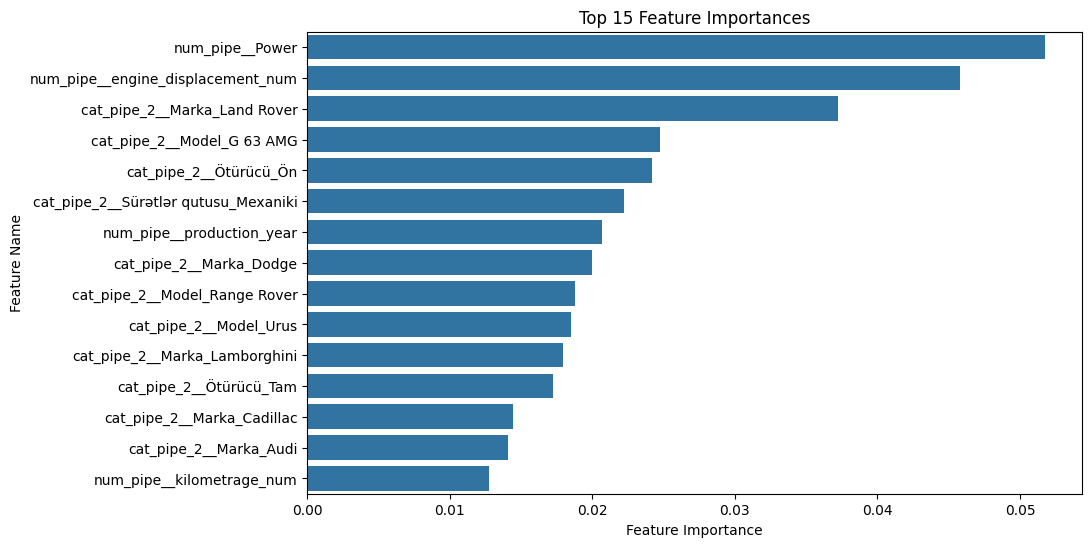

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances
feature_importances = xgb_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importances})

#Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Select top N features (e.g., top 15)
top_features = feat_imp_df['Feature'].head(15).tolist()

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp_df['Importance'][:15], y=feat_imp_df['Feature'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 15 Feature Importances")
plt.show()



### Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)  # alpha controls the regularization strength
model.fit(X_train_transformed, y_train)
print(model.score(X_test_transformed, y_test_sample))
#lower score

0.7372461845487215


METRICS

In [43]:
y_pred_ridge = model.predict(X_test_transformed)

mae_ridge = mean_absolute_error(y_test_sample, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_sample, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5

print(f"Ridge Model MAE: {mae_ridge:.2f}")
print(f"Ridge Model MSE: {mse_ridge:.2f}")
print(f"Ridge Model RMSE: {rmse_ridge:.2f}")

Ridge Model MAE: 8327.88
Ridge Model MSE: 351561017.44
Ridge Model RMSE: 18749.96


### PCA with Linear Regression

In [44]:
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression


pca = IncrementalPCA(n_components=12, batch_size=1000)
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),  # Apply PCA
    ('regressor', LinearRegression())
])

In [45]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production_year',
                                                   'engine_displacement_num',
                                                   'kilometrage_num',
                                                   'Power']),
                                                 ('cat_pipe_1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='no',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHot...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Ban növü',
                                                   'Hansı bazar üçün yığılıb',
                                                   'Marka', 'Model', 'Rəng',
                                                   'Sahiblər',
                                                   'Sürətlər qutusu',
                                                   'Vəziyyəti', 'Yeni',
                                                   'Yerlərin sayı', 'Ötürücü',
                                                   'Fuel', 'extra_info'])])),
                ('pca', IncrementalPCA(batch_size=1000, n_components=12)),
                ('regressor', LinearRegression())])

In [46]:
y_pred = regression_pipeline.predict(X_test_sample)

METRICS

In [47]:
mae = mean_absolute_error(y_test_sample, y_pred)
mse = mean_squared_error(y_test_sample, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Train Score: {regression_pipeline.score(X_train, y_train):.3f}")
print(f"Test Score: {regression_pipeline.score(X_test_sample, y_test_sample):.3f}")
#no improvement

MAE: 12841.41
MSE: 682506819.20
RMSE: 26124.83
Train Score: 0.484
Test Score: 0.490


## Conclusion

Therefore, the best method seems to be **XGBoost** (xgbm) considering the computing limitations,
as it provided a good balance of performance on the sampled data compared to Linear Regression and Ridge,
and models like PCA with Linear Regression showed no significant improvement.